In [3]:
#!/usr/bin/env python3 

In [1]:
# Steam Tables Analysis 

In [1]:
# Importing the necessary modules 
import joblib, pickle, sklearn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import ARDRegression


# Setting some basic config for plotting 
sns.set_color_codes("dark") 
sns.set(style="whitegrid")
# ax = plt.axes() 
# plt.axes().set_facecolor('orange') 

In [2]:
# Displaying the version used for sklearn 
print(f"Sklearn Version: {sklearn.__version__}")

Sklearn Version: 1.0


In [3]:
# Setting the path to the steam tables dataset 
dataset = "steam_tables.xlsx" 

# Loading the steam tables into memory 
df = pd.read_excel(dataset) 

# Viewing the head of the loaded dataframe 
df.head() 

,P (kPa),T (°C ),vf (m3/kg),vg (m3/kg ),vfg (m3/kg ),hf (kJ/kg ),hg (kJ/kg ),hfg (kJ/kg ),uf (kJ/kg),ug (kJ/kg),ufg (kJ/kg ),sf (kJ/(kg K),sg (kJ/(kg K),sfg kJ/(kg K)
0,1,6.99,0.000997,128.97,128.97,29.40,2514.61,2485.21,29.40,2385.64,2356.24,0.1058,8.9770,8.8713
1,2,17.50,0.001000,67.00,67.00,73.42,2534.32,2460.90,73.42,2400.31,2326.89,0.2606,8.7254,8.4648
2,3,24.09,0.001002,45.66,45.66,100.97,2546.23,2445.26,100.97,2409.25,2308.28,0.3544,8.5791,8.2247
3,4,28.98,0.001003,34.79,34.79,121.38,2554.99,2433.61,121.38,2415.82,2294.44,0.4225,8.4759,8.0534
4,5,32.90,0.001005,28.19,28.18,137.74,2561.99,2424.25,137.73,2421.06,2283.33,0.4763,8.3963,7.9200


In [4]:
# Describing the data 
df.describe() 

,P (kPa),T (°C ),vf (m3/kg),vg (m3/kg ),vfg (m3/kg ),hf (kJ/kg ),hg (kJ/kg ),hfg (kJ/kg ),uf (kJ/kg),ug (kJ/kg),ufg (kJ/kg ),sf (kJ/(kg K),sg (kJ/(kg K),sfg kJ/(kg K)
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,4950.322581,202.883226,0.001251,3.891066,3.889911,906.587661,2718.134677,1811.546774,898.846613,2542.931935,1644.084839,2.314902,6.521671,4.206765
std,6364.318564,105.045000,0.000247,14.389949,14.390070,510.154747,71.377426,485.912267,500.417412,53.039034,473.861716,1.065345,0.955574,2.017759
min,1.000000,6.990000,0.000997,0.005867,0.003975,29.400000,2514.610000,752.210000,29.400000,2385.640000,664.760000,0.105800,5.052500,0.926100
25%,193.750000,119.187500,0.001060,0.022516,0.021120,500.047500,2667.580000,1440.145000,499.842500,2512.620000,1264.625000,1.518200,5.725525,2.495325
50%,962.500000,178.220000,0.001125,0.201700,0.200600,754.920000,2741.035000,2019.925000,753.835000,2559.375000,1826.900000,2.120650,6.596050,4.475400
75%,8312.500000,297.677500,0.001396,0.914125,0.913300,1331.657500,2773.585000,2204.612500,1320.055000,2581.955000,2028.102500,3.230275,7.137200,5.619075
max,22000.000000,375.090000,0.001892,128.970000,128.970000,1881.570000,2802.330000,2485.210000,1839.960000,2602.310000,2356.240000,4.126400,8.977000,8.871300


In [5]:
# Viewing all the columns names for the loaded dataframe 
df.columns

Index(['P (kPa)', 'T (°C )', 'vf (m3/kg)', 'vg (m3/kg )', 'vfg (m3/kg )',
       'hf (kJ/kg )', 'hg (kJ/kg )', 'hfg (kJ/kg )', 'uf (kJ/kg)',
       'ug (kJ/kg)', 'ufg (kJ/kg )', 'sf (kJ/(kg K) ', 'sg (kJ/(kg K)',
       'sfg kJ/(kg K) '],
      dtype='object')

In [6]:
# Checking the max and min values for the temperature column data 
df['T (°C )'].describe() 

count    124.000000
mean     202.883226
std      105.045000
min        6.990000
25%      119.187500
50%      178.220000
75%      297.677500
max      375.090000
Name: T (°C ), dtype: float64

In [7]:
# Checking the max and min values for the pressure column data points 
df['P (kPa)'].describe() 

count      124.000000
mean      4950.322581
std       6364.318564
min          1.000000
25%        193.750000
50%        962.500000
75%       8312.500000
max      22000.000000
Name: P (kPa), dtype: float64

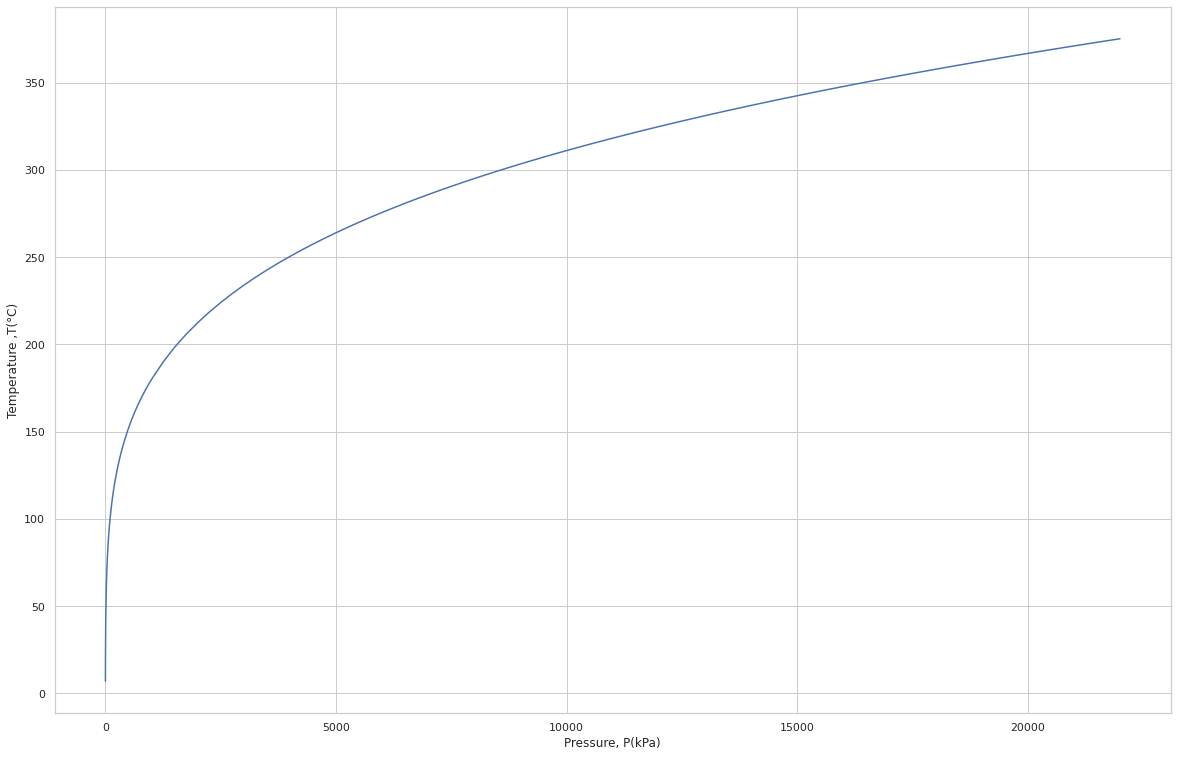

In [8]:
# Converting the values into numpy arrays 
temp = df['T (°C )'].values 
pressure = df['P (kPa)'].values 

# Simple plots 
# Setting the dimensions 
plt.figure(figsize=(20, 13)) 

# Plotting the Pressure, temperature curve 
plt.plot(pressure, temp) 
plt.ylabel('Temperature ,T(°C)') 
plt.xlabel('Pressure, P(kPa)') 
plt.grid(True)
plt.show() 

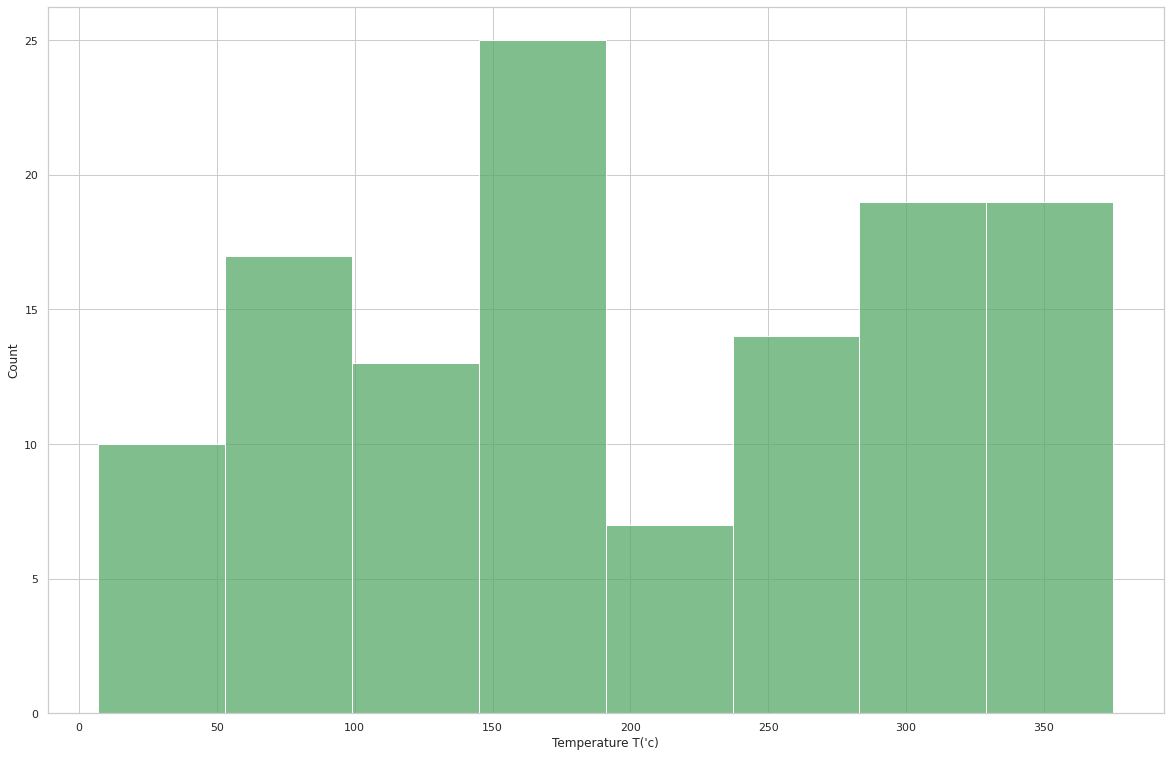

In [9]:
# Showing the temperature ranges on a histogram plot 
# Setting the dimensions 
plt.figure(figsize=(20, 13)) 

# Plotting the temperature as a hist plot 
sns.histplot(df['T (°C )'], color="g") 
plt.xlabel("Temperature T('c)") 
plt.grid(True) 
plt.show() 

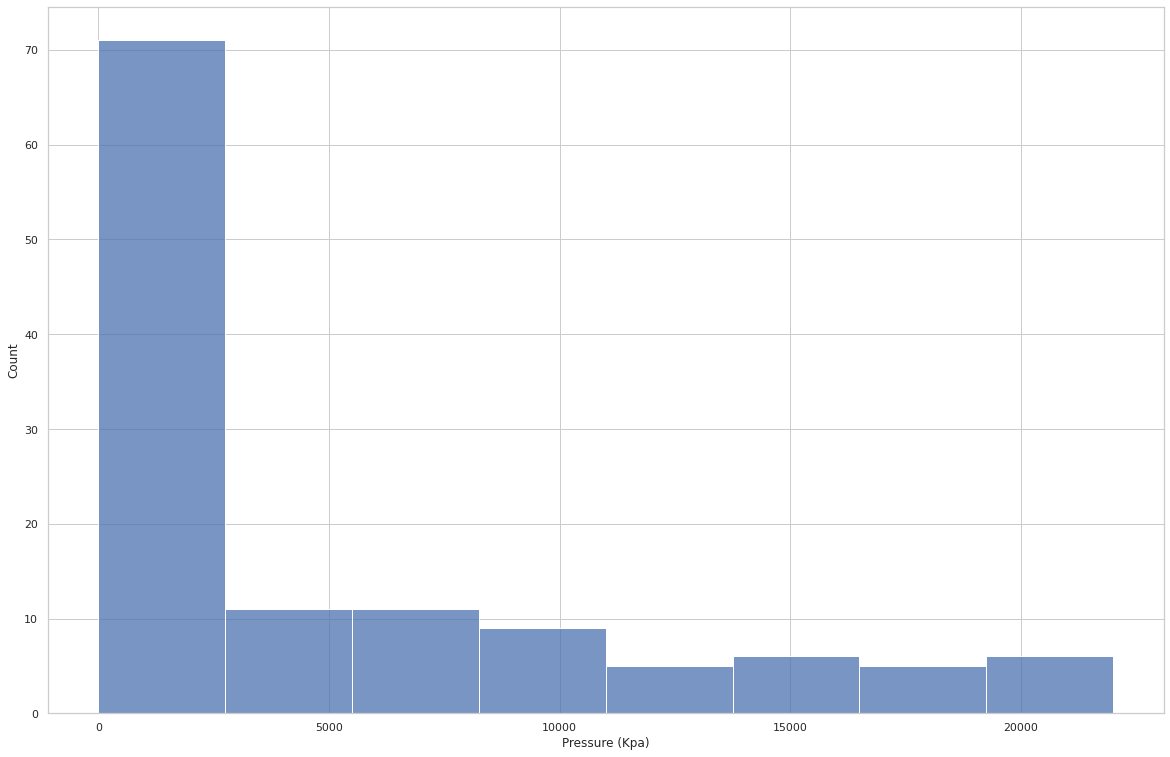

In [10]:
# Setting the dimensions 
plt.figure(figsize=(20, 13)) 

# Plotting the pressure values as a hist plot  
sns.histplot(pressure, color="b") 
plt.xlabel("Pressure (Kpa)") 
plt.grid(True) 

# Displaying the plot 
plt.show() 

<Figure size 1440x936 with 0 Axes>

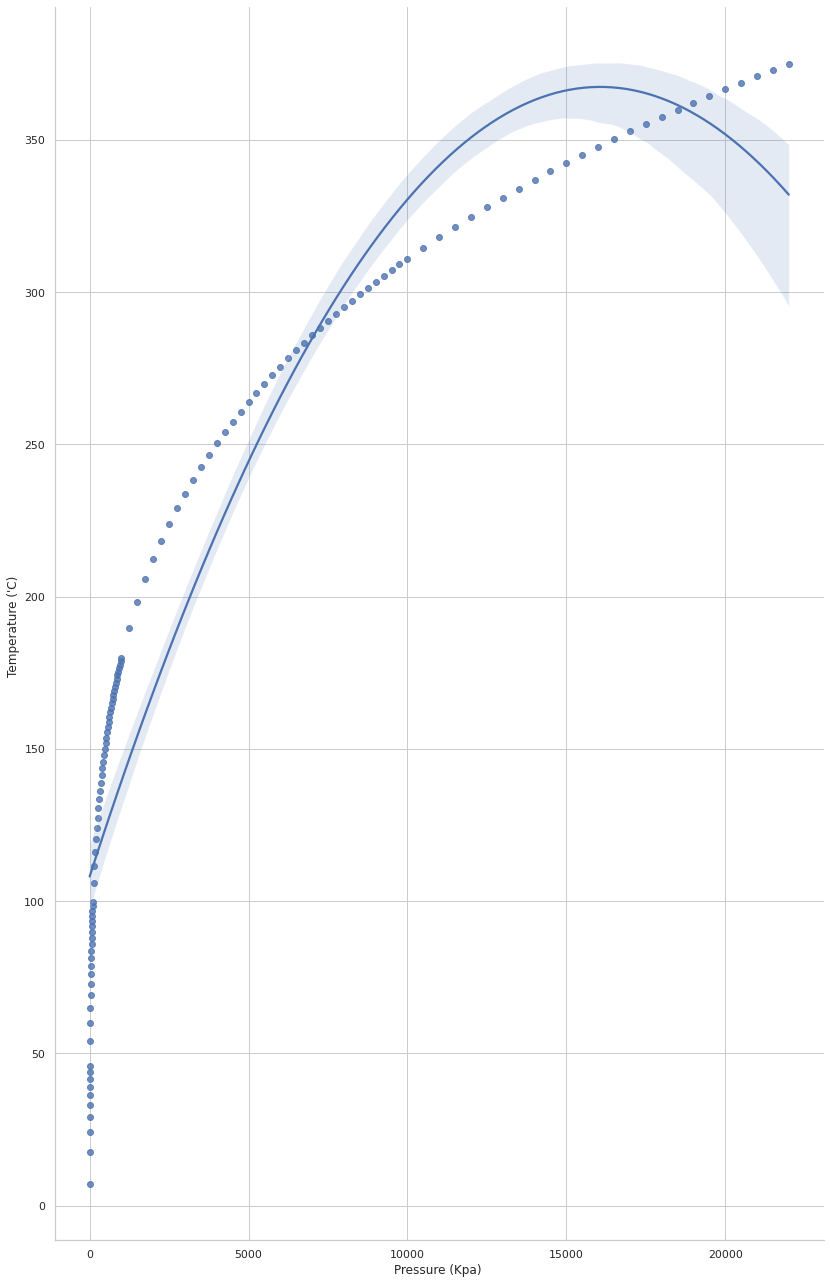

In [11]:
# Comparing both the input and output variables 
# Setting the dimensions 
plt.figure(figsize=(20, 13))  

# Exploring the dataset using a scatter plot 
sns.lmplot(x='P (kPa)', y='T (°C )', data=df, order=2, height=18, aspect=0.65) 
plt.xlabel("Pressure (Kpa) ") 
plt.ylabel("Temperature ('C) ") 
plt.show() 

In [12]:
# Reshaping the dataframe
X = pressure.reshape(-1, 1) 
y = temp.reshape(-1, 1) 

# Displaying the dim of both the input and output labels 
print(f"Input Shape: {X.shape}") 
print(f"Output Shape: {y.shape}") 

Input Shape: (124, 1)
Output Shape: (124, 1)


In [13]:
# Splitting the traning samples into train test split data 
X_train, X_test, y_train, y_test = train_test_split(X, y) 

# Displaying the shape of the training dataset 
print(f"Input Shape: {X_train.shape}, {X_test.shape}") 
print(f"Output Shape: {y_train.shape}, {y_test.shape}") 

Input Shape: (93, 1), (31, 1)
Output Shape: (93, 1), (31, 1)


<h3> Using Linear Regression Model </h3> 

In [14]:
# Building a simple model using "Linear Regression" 
model = LinearRegression() 

In [15]:
# Fitting the data 
# model.fit(X_train, y_train)
model.fit(X, y)

# Displaying the accuracy of the model 
model.score(X, y) 

0.7799247139258435

In [16]:
# Seralizing the temperature model using "joblib" 
temperature_model = "tempModel.bin"
joblib.dump(model, temperature_model)

['tempModel.bin']

In [17]:
# Reading the model into memory 
temperature_model = "tempModel.bin"
model = joblib.load(temperature_model)

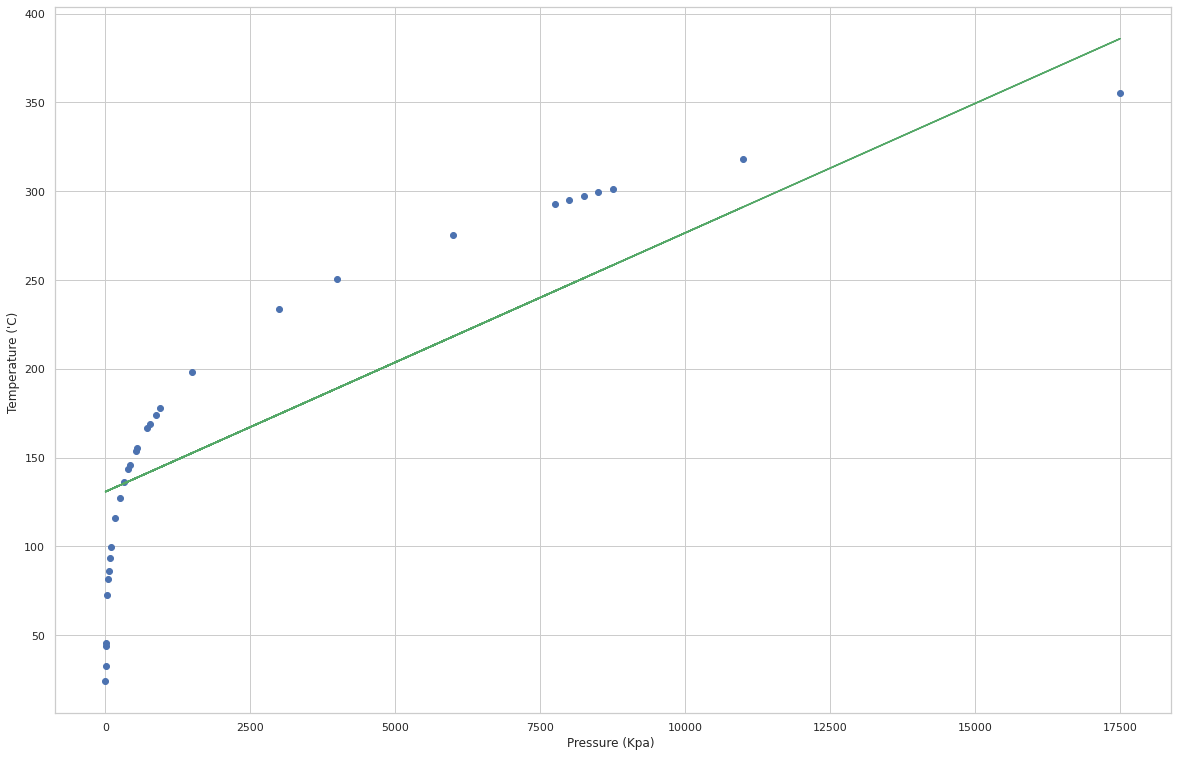

In [18]:
# Setting the dimensions 
plt.figure(figsize=(20, 13)) 

# Predictions 
y_pred = model.predict(X_test) 
plt.scatter(X_test, y_test, color="b") 
plt.plot(X_test, y_pred, color="g") 
plt.grid(True)
plt.xlabel("Pressure (Kpa) ") 
plt.ylabel("Temperature ('C) ")

plt.show() 

In [19]:
# Random predictions 
pressure_value = 101.2345
pressure_value = np.asarray(pressure_value).reshape(1, -1) 

# Making the predictions for the co-responding temperature value 
result = model.predict(pressure_value) 
print(f"The predicted temperature is: {result[0][0]}") 

The predicted temperature is: 132.20105312277164


In [20]:
df.head()

,P (kPa),T (°C ),vf (m3/kg),vg (m3/kg ),vfg (m3/kg ),hf (kJ/kg ),hg (kJ/kg ),hfg (kJ/kg ),uf (kJ/kg),ug (kJ/kg),ufg (kJ/kg ),sf (kJ/(kg K),sg (kJ/(kg K),sfg kJ/(kg K)
0,1,6.99,0.000997,128.97,128.97,29.40,2514.61,2485.21,29.40,2385.64,2356.24,0.1058,8.9770,8.8713
1,2,17.50,0.001000,67.00,67.00,73.42,2534.32,2460.90,73.42,2400.31,2326.89,0.2606,8.7254,8.4648
2,3,24.09,0.001002,45.66,45.66,100.97,2546.23,2445.26,100.97,2409.25,2308.28,0.3544,8.5791,8.2247
3,4,28.98,0.001003,34.79,34.79,121.38,2554.99,2433.61,121.38,2415.82,2294.44,0.4225,8.4759,8.0534
4,5,32.90,0.001005,28.19,28.18,137.74,2561.99,2424.25,137.73,2421.06,2283.33,0.4763,8.3963,7.9200


In [21]:
# Creating a model for prediction of pressure values 
X = temp.reshape(-1, 1) 
y = pressure.reshape(-1, 1)

# Building a simple model using "Linear Regression" 
pressureModel =  LinearRegression()

# fitting the model 
pressureModel.fit(X, y)
pressureModel.score(X, y)

# serialize the model to disk 
pressure_model = "pressureModel.bin"
joblib.dump(pressureModel, pressure_model)

['pressureModel.bin']

In [22]:
# Building a simple model using "Linear Regression" 
pressureModel =  LinearRegression()

# loading the pressure model from disk 
pressure_model = "pressureModel.bin"; 
pressureModel = joblib.load(pressure_model); 

In [23]:
pressureModel.predict(np.array(134.2234).reshape(-1, 1))

array([[1276.60673305]])

In [24]:
np.array(132.2).reshape(-1, 1)

array([[132.2]])

<html>
<h3>
   <b> Working With Tensorflow </b>
</h3>

 <p> 
     The type of predictive modelling problem for this task is <b> Linear Regression </b> 
</p> 

</html>

In [25]:
# Displaying all the anaconda environments 
!conda info --envs 

# conda environments:
#
base                     /home/mbonu/anaconda3
ml                    *  /home/mbonu/anaconda3/envs/ml
tf_model                 /home/mbonu/anaconda3/envs/tf_model



In [26]:
# Importing the necessary modules 
import os 
import joblib
import numpy as np 
import pandas as pd 
import sklearn as sk  
import seaborn as sns  
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Input, Lambda, Concatenate
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler

# Disabling tensorflow version 2 behaviour 
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [27]:
# Setting the dataset path
dataset = "steam_tables.xlsx" 

# Loading the steam tables into memory 
df = pd.read_excel(dataset) 

# Viewing the head of the loaded dataframe 
df.head() 

,P (kPa),T (°C ),vf (m3/kg),vg (m3/kg ),vfg (m3/kg ),hf (kJ/kg ),hg (kJ/kg ),hfg (kJ/kg ),uf (kJ/kg),ug (kJ/kg),ufg (kJ/kg ),sf (kJ/(kg K),sg (kJ/(kg K),sfg kJ/(kg K)
0,1,6.99,0.000997,128.97,128.97,29.40,2514.61,2485.21,29.40,2385.64,2356.24,0.1058,8.9770,8.8713
1,2,17.50,0.001000,67.00,67.00,73.42,2534.32,2460.90,73.42,2400.31,2326.89,0.2606,8.7254,8.4648
2,3,24.09,0.001002,45.66,45.66,100.97,2546.23,2445.26,100.97,2409.25,2308.28,0.3544,8.5791,8.2247
3,4,28.98,0.001003,34.79,34.79,121.38,2554.99,2433.61,121.38,2415.82,2294.44,0.4225,8.4759,8.0534
4,5,32.90,0.001005,28.19,28.18,137.74,2561.99,2424.25,137.73,2421.06,2283.33,0.4763,8.3963,7.9200


In [28]:
# Check if the dataframe has null or NaN values 
df.isna().sum() 

P (kPa)           0
T (°C )           0
vf (m3/kg)        0
vg (m3/kg )       0
vfg (m3/kg )      0
hf (kJ/kg )       0
hg (kJ/kg )       0
hfg (kJ/kg )      0
uf (kJ/kg)        0
ug (kJ/kg)        0
ufg (kJ/kg )      0
sf (kJ/(kg K)     0
sg (kJ/(kg K)     0
sfg kJ/(kg K)     0
dtype: int64

In [29]:
# Drop the NaN values 
df = df.dropna() 

In [30]:
# Getting all the columns names 
df.columns

Index(['P (kPa)', 'T (°C )', 'vf (m3/kg)', 'vg (m3/kg )', 'vfg (m3/kg )',
       'hf (kJ/kg )', 'hg (kJ/kg )', 'hfg (kJ/kg )', 'uf (kJ/kg)',
       'ug (kJ/kg)', 'ufg (kJ/kg )', 'sf (kJ/(kg K) ', 'sg (kJ/(kg K)',
       'sfg kJ/(kg K) '],
      dtype='object')

In [31]:
# Splitting the dataset into input and output target variables,
# Reshape the dataset for further pre-processing. 
pressureValues = df["P (kPa)"].values.reshape(-1, 1); 
temperatureValues = df["T (°C )"].values.reshape(-1, 1); 

# Converting the dataset into datatype of "float32" 
pressureValues = np.asarray(pressureValues, dtype="float32");
temperatureValues = np.asarray(temperatureValues, dtype="float32");  

# Displaying the shape, and type of the pressure data. 
print("Pressure Data Shape: ", pressureValues.shape)
print("Pressure Data Type: ", pressureValues.dtype); 

# Displaying the shape, and type of the temperature data. 
print("Temperature Data Shape: ", temperatureValues.shape); 
print("Temperature Data Type: ", temperatureValues.dtype);

Pressure Data Shape:  (124, 1)
Pressure Data Type:  float32
Temperature Data Shape:  (124, 1)
Temperature Data Type:  float32


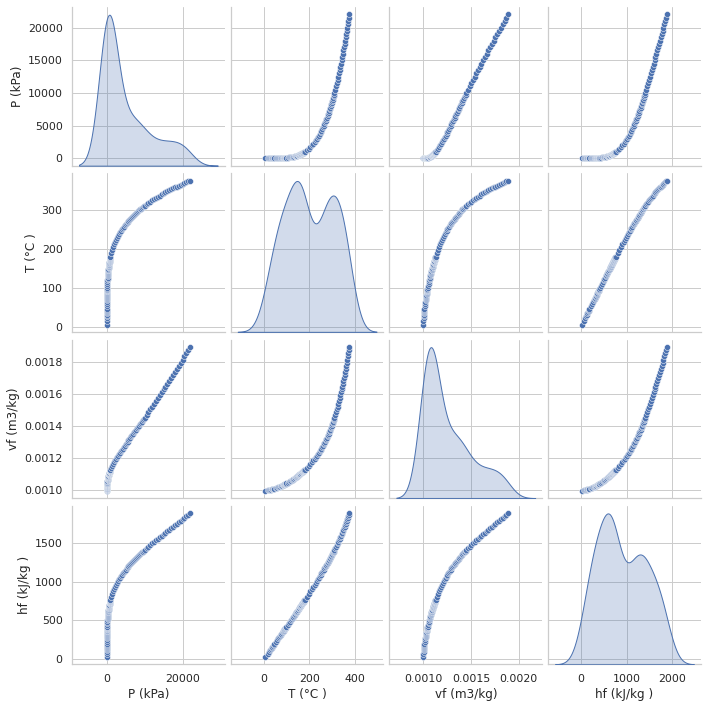

In [32]:
# Inspect the data
sns.pairplot(df[['P (kPa)', 'T (°C )', 'vf (m3/kg)', 'hf (kJ/kg )']], diag_kind='kde')

# Display the plot 
plt.show() 

In [33]:
# Checking the overall statistics 
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
P (kPa),124.0,4950.322581,6364.318564,1.000000,193.750000,962.500000,8312.500000,22000.000000
T (°C ),124.0,202.883226,105.045000,6.990000,119.187500,178.220000,297.677500,375.090000
vf (m3/kg),124.0,0.001251,0.000247,0.000997,0.001060,0.001125,0.001396,0.001892
vg (m3/kg ),124.0,3.891066,14.389949,0.005867,0.022516,0.201700,0.914125,128.970000
vfg (m3/kg ),124.0,3.889911,14.390070,0.003975,0.021120,0.200600,0.913300,128.970000
hf (kJ/kg ),124.0,906.587661,510.154747,29.400000,500.047500,754.920000,1331.657500,1881.570000
hg (kJ/kg ),124.0,2718.134677,71.377426,2514.610000,2667.580000,2741.035000,2773.585000,2802.330000
hfg (kJ/kg ),124.0,1811.546774,485.912267,752.210000,1440.145000,2019.925000,2204.612500,2485.210000
uf (kJ/kg),124.0,898.846613,500.417412,29.400000,499.842500,753.835000,1320.055000,1839.960000
ug (kJ/kg),124.0,2542.931935,53.039034,2385.640000,2512.620000,2559.375000,2581.955000,2602.310000


In [34]:
# Normalization 
"""
In the table of statistics, it's easy to see how different the ranges
of each feature are. 
"""
df.describe().transpose()[['mean', 'std']] 

,mean,std
P (kPa),4950.322581,6364.318564
T (°C ),202.883226,105.045000
vf (m3/kg),0.001251,0.000247
vg (m3/kg ),3.891066,14.389949
vfg (m3/kg ),3.889911,14.390070
hf (kJ/kg ),906.587661,510.154747
hg (kJ/kg ),2718.134677,71.377426
hfg (kJ/kg ),1811.546774,485.912267
uf (kJ/kg),898.846613,500.417412
ug (kJ/kg),2542.931935,53.039034


In [35]:
# Creating an instance of the encoder class "standardScaler" 
pressure_enc = StandardScaler() 
temp_enc = StandardScaler()

# Scaling the pressure data, temperature  
pressureScaled = pressure_enc.fit_transform(pressureValues) 
temperatureScaled = temp_enc.fit_transform(temperatureValues)

In [36]:
# 
# def build_model():
#     model = Sequential() 
#     model.add(Dense(120, input_dim=1))
#     model.add(Dense(32, activation="relu")) 
#     model.add(Dense(32, activation="relu"))
#     model.add(Dense(8, activation="relu")) 
#     model.add(Dense(1)) 
    
#     return model 

<h3> Pressure Model </h3> 

In [37]:
# Building the neural network model
def build_model():
    model = Sequential() 
    model.add(Dense(250, input_dim=1))
    model.add(Dense(150, activation="relu")) 
    model.add(Dense(120, activation="relu")) 
    model.add(Dense(32, activation="relu")) 
    model.add(Dense(8, activation="relu")) 
    model.add(Dense(1)) 
    
    # Returning the model
    return model 
    

# callback = tf.keras.callbacks.LearningRateScheduler(scheduler) 
optimizer = Adam() 
model = build_model() 

# Compiling the model
model.compile(loss="mean_squared_error", optimizer="sgd")  

In [38]:
# Model summary 
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               37650     
_________________________________________________________________
dense_2 (Dense)              (None, 120)               18120     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                3872      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 60,415
Trainable params: 60,415
Non-trainable params: 0
____________________________________________________

In [39]:
# Fitting the data 
H = model.fit(temperatureScaled, pressureScaled, batch_size=20, epochs=1000, verbose=0) 

2022-04-17 02:20:13.758563: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-17 02:20:13.758967: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [40]:
# Saving the model to disk 
# model.save("pressureModel.h5", save_format="h5")

# Getting the file path for both the pressure encoder 
# and the temperature encoder 
pressure_encoder = "pressure_encoder.bin" 
temp_encoder = "temperature_encoder.bin"

# Saving the encoders to disk 
joblib.dump(pressure_enc, pressure_encoder)
joblib.dump(temp_enc, temp_encoder)

['temperature_encoder.bin']

/home/mbonu/anaconda3/envs/ml/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


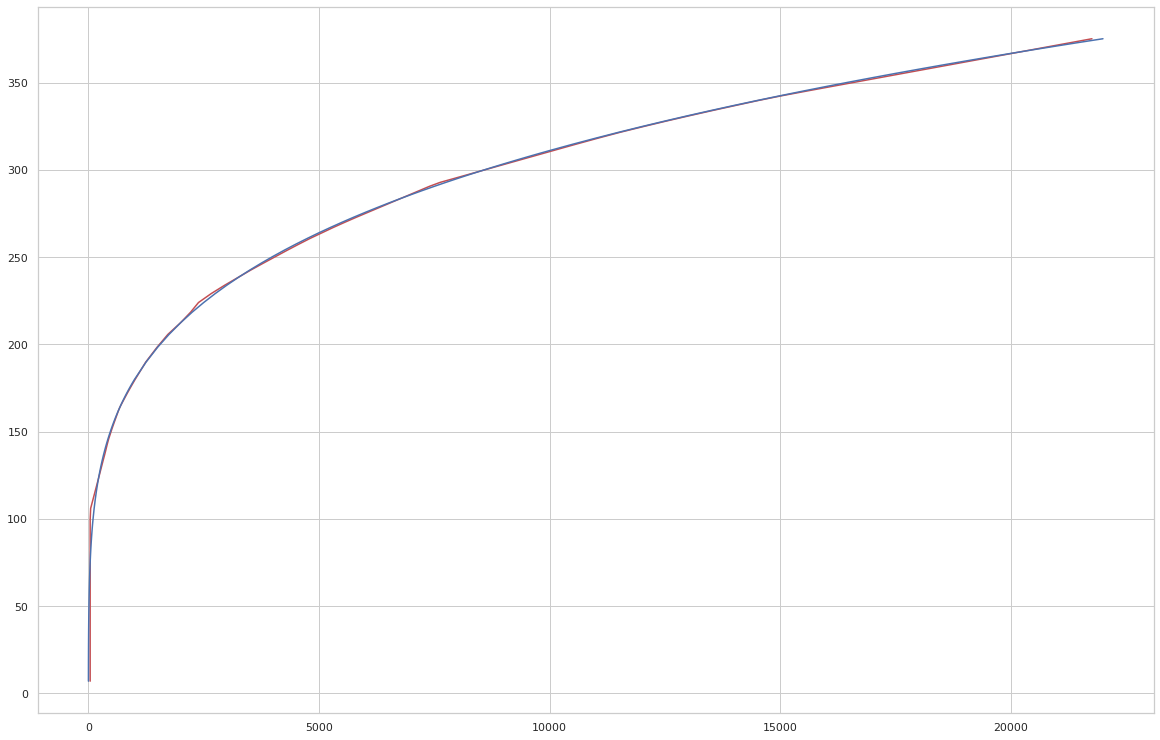

In [41]:
# Scaling back 
plt.figure(figsize=(20, 13))

# 
classes = model.predict(temperatureScaled) 
predictedPressure = pressure_enc.inverse_transform(classes)
Temp = temperatureValues

# 
plt.plot(predictedPressure, temperatureValues, c="r") 
plt.plot(pressureValues, temperatureValues, c="b")

plt.show() 

In [42]:
test_array = np.array([160.43]).reshape(1, -1) 
test_array = temp_enc.transform(test_array) 

result = model.predict(test_array)
result = pressure_enc.inverse_transform(result)
result

array([[630.3138]], dtype=float32)

<h3> Temperature Model </h3> 

In [43]:
# Viewing the head of the dataframe 
df.head(5)

,P (kPa),T (°C ),vf (m3/kg),vg (m3/kg ),vfg (m3/kg ),hf (kJ/kg ),hg (kJ/kg ),hfg (kJ/kg ),uf (kJ/kg),ug (kJ/kg),ufg (kJ/kg ),sf (kJ/(kg K),sg (kJ/(kg K),sfg kJ/(kg K)
0,1,6.99,0.000997,128.97,128.97,29.40,2514.61,2485.21,29.40,2385.64,2356.24,0.1058,8.9770,8.8713
1,2,17.50,0.001000,67.00,67.00,73.42,2534.32,2460.90,73.42,2400.31,2326.89,0.2606,8.7254,8.4648
2,3,24.09,0.001002,45.66,45.66,100.97,2546.23,2445.26,100.97,2409.25,2308.28,0.3544,8.5791,8.2247
3,4,28.98,0.001003,34.79,34.79,121.38,2554.99,2433.61,121.38,2415.82,2294.44,0.4225,8.4759,8.0534
4,5,32.90,0.001005,28.19,28.18,137.74,2561.99,2424.25,137.73,2421.06,2283.33,0.4763,8.3963,7.9200


In [44]:
df_frame = df[['P (kPa)', 'T (°C )']]
df_frame.columns = ["pressure(kPa)", "temp(°C)"] 
df_frame.head() 

,pressure(kPa),temp(°C)
0,1,6.99
1,2,17.50
2,3,24.09
3,4,28.98
4,5,32.90


In [45]:
# Building the neural network model
def temperature_model():
    model = Sequential() 
    model.add(Dense(250, input_dim=1))
    model.add(Dense(150, activation="relu")) 
    model.add(Dense(120, activation="relu"))
    model.add(Dense(32, activation="relu")) 
    model.add(Dense(1)) 
    
    # Returning the model
    return model 
    

# callback = tf.keras.callbacks.LearningRateScheduler(scheduler) 
optimizer = Adam() 
temp_model = temperature_model() 

# Compiling the model
temp_model.compile(loss="mean_squared_error", optimizer="sgd")  

# Model summary 
temp_model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 250)               500       
_________________________________________________________________
dense_7 (Dense)              (None, 150)               37650     
_________________________________________________________________
dense_8 (Dense)              (None, 120)               18120     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                3872      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 60,175
Trainable params: 60,175
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Fitting the data 
H = temp_model.fit(pressureScaled, temperatureScaled, batch_size=32, epochs=1000, verbose=0) 

/home/mbonu/anaconda3/envs/ml/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


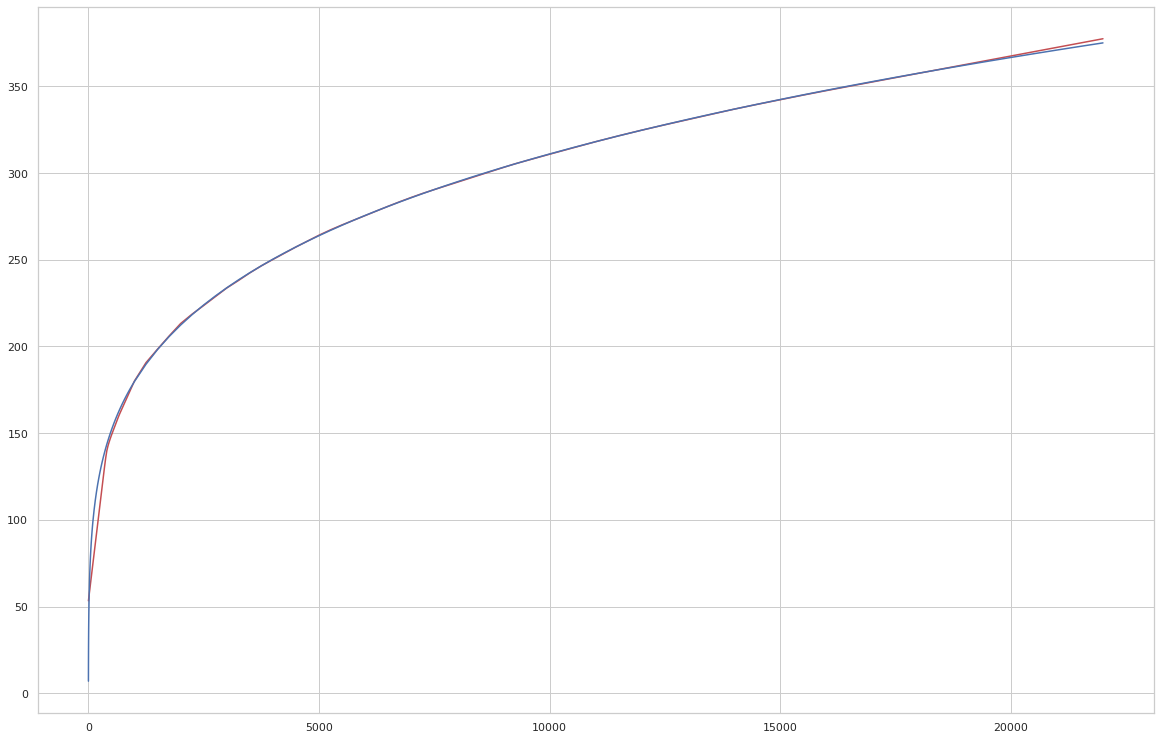

In [47]:
# Displaying the performance of the model 
plt.figure(figsize=(20, 13)) 

# Making predictions 
predValues = temp_model.predict(pressureScaled) 
predValues = temp_enc.inverse_transform(predValues) 

# Plotting 
plt.plot(pressureValues, predValues, c="r") 
plt.plot(pressureValues, temperatureValues, c="b") 

# Displaying the plot 
plt.show() 

In [48]:
# Saving the model to disk 
temp_model.save("temperatureModel.h5", save_format="h5") 

In [49]:
# Setting the path to both the pressure, and temperature 
# Encoders
pressure_encoder = "pressure_encoder.bin" 
temp_encoder = "temperature_encoder.bin"

# loading the encoders 
pressure_enc = joblib.load(pressure_encoder) 
temperature_enc = joblib.load(temp_encoder) 

In [50]:
# Viewing the head of the dataframe 
df.head() 

,P (kPa),T (°C ),vf (m3/kg),vg (m3/kg ),vfg (m3/kg ),hf (kJ/kg ),hg (kJ/kg ),hfg (kJ/kg ),uf (kJ/kg),ug (kJ/kg),ufg (kJ/kg ),sf (kJ/(kg K),sg (kJ/(kg K),sfg kJ/(kg K)
0,1,6.99,0.000997,128.97,128.97,29.40,2514.61,2485.21,29.40,2385.64,2356.24,0.1058,8.9770,8.8713
1,2,17.50,0.001000,67.00,67.00,73.42,2534.32,2460.90,73.42,2400.31,2326.89,0.2606,8.7254,8.4648
2,3,24.09,0.001002,45.66,45.66,100.97,2546.23,2445.26,100.97,2409.25,2308.28,0.3544,8.5791,8.2247
3,4,28.98,0.001003,34.79,34.79,121.38,2554.99,2433.61,121.38,2415.82,2294.44,0.4225,8.4759,8.0534
4,5,32.90,0.001005,28.19,28.18,137.74,2561.99,2424.25,137.73,2421.06,2283.33,0.4763,8.3963,7.9200


In [51]:
# Creating a numpy array to hold the pressure value, 
# reshape and transform the pressure data into encoded values
pressureValue = np.array([568.87]).reshape(1, -1) 
pressureValue = pressure_enc.transform(pressureValue) 

In [52]:
pressureValue 

array([[-0.69123305]])

In [53]:
# Making predictions 
predicted_temperature = temp_model.predict(pressureValue) 
predicted_temperature = temperature_enc.transform(predicted_temperature) 

In [54]:
predicted_temperature

array([[-1.9437243]], dtype=float32)